In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**confusion matrix**

In [26]:
sns.set(font_scale=2)
# 행은 실제값, 열은 예측값
array = [[5,0,0,0],    # A인데 A로 예측한 것이 5건
         [0,10,0,0],   # B인데 B로 예측한 것이 10건
         [0,0,15,0],
         [0,0,0,5]]

In [27]:
df_cm = pd.DataFrame(array, index = [i for i in "ABCD"], columns = [i for i in "ABCD"])
df_cm

,A,B,C,D
A,5,0,0,0
B,0,10,0,0
C,0,0,15,0
D,0,0,0,5


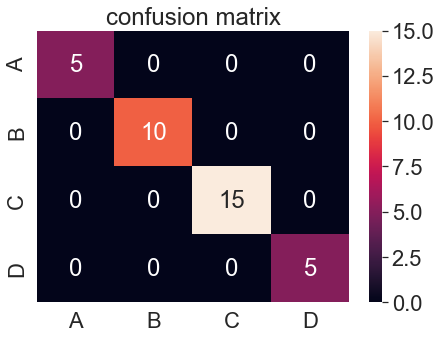

In [28]:
plt.figure(figsize = (7,5))
plt.title('confusion matrix')
sns.heatmap(df_cm, annot = True)
plt.show()

In [29]:
array = [[9,1,0,0],    
         [1,15,3,1],   
         [5,0,24,1],
         [0,4,1,15]]

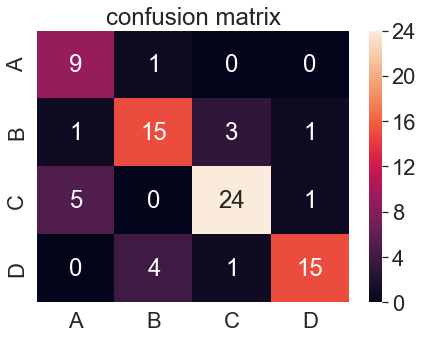

In [30]:
df_cm = pd.DataFrame(array, index = [i for i in "ABCD"], columns = [i for i in "ABCD"])
df_cm
plt.figure(figsize = (7,5))
plt.title('confusion matrix')
sns.heatmap(df_cm, annot = True)
plt.show()

* * * 

**mnist CLassifier - randomforest**

In [31]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [32]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
print(np.shape((features)))
print(np.shape((labels)))

(1797, 64)
(1797,)


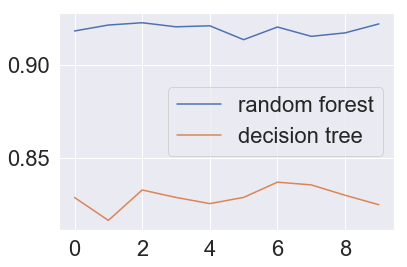

0.8287212035413265
0.9192764884976411


In [33]:
def cross_validation(classifier, features, labels):
    cv_scores = []
    for i in range(10):
        scores = cross_val_score(classifier, features, labels, cv = 10, scoring='accuracy')
        cv_scores.append(scores.mean())
    return cv_scores
    
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

cv_list = [['random forest', rf_cv_scores],
           ['decision tree', dt_cv_scores]]

df = pd.DataFrame.from_items(cv_list)
df.plot()
plt.show()

print(np.mean(dt_cv_scores))
print(np.mean(rf_cv_scores))

* * *

**KNN CLassifier**

In [34]:
import pandas
with open('DataSet/nba_2013.csv', 'r') as csvfile:
    nba = pandas.read_csv(csvfile)
nba.head(15)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,...,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,...,599,765,178,63,68,123,147,1603,2013-2014,2013
7,Lavoy Allen,PF,24,TOT,65,2,1072,134,300,0.447,...,192,311,71,24,33,44,126,303,2013-2014,2013
8,Ray Allen,SG,38,MIA,73,9,1936,240,543,0.442,...,182,205,143,54,8,84,115,701,2013-2014,2013
9,Tony Allen,SG,32,MEM,55,28,1278,204,413,0.494,...,129,208,94,90,19,90,121,495,2013-2014,2013


In [35]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [36]:
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts']
len(distance_columns)

26

In [37]:
import math

selected_player = nba[nba["player"]=="LeBron James"].iloc[0]

def euclidean_distance(row) :
    inner_value = 0
    for k in distance_columns :
        inner_value += (selected_player[k]-row[k])**2
    return math.sqrt(inner_value)
LeBron_distance = nba.apply(euclidean_distance, axis = 1)
LeBron_distance.head(15)

0     3475.792868
1             NaN
2             NaN
3     1189.554979
4     3216.773098
5             NaN
6      960.443178
7     3131.071083
8     2326.129199
9     2806.955657
10    2277.933945
11            NaN
12    2819.058890
13    2534.074598
14    1970.085795
dtype: float64

In [38]:
nba_numeric = nba[distance_columns]
nba_numeric.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,NaN,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


In [39]:
nba_normalized = (nba_numeric - nba_numeric.mean())/nba_numeric.std()
nba_normalized.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,-0.835906,0.384886,-0.862207,-0.435088,-0.738401,-0.768505,0.319884,-0.700282,-0.716608,-0.117009,...,-0.389712,0.260690,-0.129462,-0.013116,-0.645220,-0.468056,0.061410,-0.667650,0.226515,-0.734621
1,-1.550487,1.095711,-0.187863,-0.045011,-0.581271,-0.649215,0.674593,-0.778936,-0.829601,NaN,...,-0.882950,1.387883,0.187020,0.565852,-0.530733,0.020680,1.065446,-0.013760,1.363938,-0.534801
2,0.116868,-0.010016,-0.457600,-0.308035,-0.290291,-0.405214,0.846880,-0.778936,-0.829601,NaN,...,-0.520826,0.743773,0.283340,0.436083,-0.568895,-0.439307,0.385292,-0.524113,0.029924,-0.328603
3,0.355062,0.779789,1.599148,1.465144,1.577804,1.590172,0.228673,1.737992,1.430256,0.898007,...,0.578033,-0.383420,0.462221,0.216475,1.033919,-0.123066,-0.683520,1.182380,0.423107,1.729123
4,-0.359519,0.108454,0.149309,-0.319180,-0.331028,-0.475703,1.110379,-0.778936,-0.822068,-1.808704,...,0.709147,0.614951,0.138859,0.291341,-0.553630,-0.468056,0.709175,-0.141348,1.139262,-0.400878


In [40]:
from scipy.spatial import distance

nba_normalized.fillna(0, inplace=True) # inplace = True : 기존객체(nba_normalized)에 지정된 값을 바꾸겠다
nba_normalized[nba["player"]=="LeBron James"]

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
225,0.593256,0.93775,1.734017,1.855221,3.341146,2.517376,1.323204,1.50203,1.475454,0.596156,...,0.172205,0.405615,1.989589,1.569064,2.865707,2.349365,0.06141,3.159998,0.282684,3.342567


In [41]:
LeBron_normalized = nba_normalized[nba["player"]=="LeBron James"]
euclidean_distances = nba_normalized.apply(lambda row : distance.euclidean(row, LeBron_normalized), axis =1)
euclidean_distances.head(15)

0     13.131600
1     12.180993
2     11.850978
3      6.473960
4     12.182853
5     13.881297
6      6.745977
7     12.403945
8     10.395894
9     10.649743
10     9.785699
11    14.803723
12    11.502708
13    10.863219
14     9.116650
dtype: float64

In [42]:
distance_frame = pandas.DataFrame(data = {"dist":euclidean_distances, "idx":euclidean_distances.index})
distance_frame.head(15)

,dist,idx
0,13.131600,0
1,12.180993,1
2,11.850978,2
3,6.473960,3
4,12.182853,4
5,13.881297,5
6,6.745977,6
7,12.403945,7
8,10.395894,8
9,10.649743,9


In [43]:
distance_frame.sort_values("dist", inplace=True)
distance_frame.head(15)

,dist,idx
225,0.000000,225
17,4.171854,17
136,4.206786,136
128,4.382582,128
185,4.489928,185
133,4.619280,133
123,4.673849,123
162,4.844802,162
332,4.893563,332
451,4.937466,451


In [44]:
distance_frame.iloc[1]["idx"]
distance_frame.iloc[1]

dist     4.171854
idx     17.000000
Name: 17, dtype: float64

In [45]:
second_smallest = distance_frame.iloc[1]["idx"]
most_similar_to_Lebron = nba.loc[int(second_smallest)]["player"]
print("가장 비슷한 성적의 선수 : ", most_similar_to_Lebron)

가장 비슷한 성적의 선수 :  Carmelo Anthony


* * * 

**K-means clustering**

In [46]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [47]:
labels = pd.DataFrame(iris.target)
labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [48]:
labels.columns = ['labels']

data = pd.DataFrame(iris.data)
data.columns = ['Sepal_Length', 'Sepal_width', 'Petal_Lenght', 'Petal_width']
data.head(15)

,Sepal_Length,Sepal_width,Petal_Lenght,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [49]:
data = pd.concat([data,labels], axis = 1)
data.head(15)

,Sepal_Length,Sepal_width,Petal_Lenght,Petal_width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [50]:
feature = data[['Sepal_Length', 'Sepal_width']]
feature.head(15)

,Sepal_Length,Sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [51]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [52]:
model = KMeans(n_clusters = 3, algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns = ['predict']
predict.head()

,predict
0,1
1,1
2,1
3,1
4,1


In [53]:
r = pd.concat([feature, predict], axis =1)
r.head()

,Sepal_Length,Sepal_width,predict
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


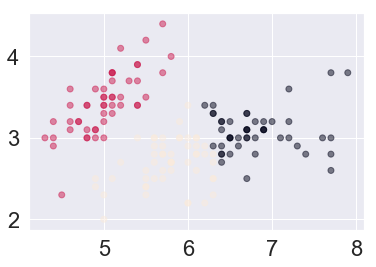

In [54]:
plt.scatter(r['Sepal_Length'], r['Sepal_width'],c=r['predict'], alpha=0.5)
plt.show()

In [55]:
centers = pd.DataFrame(model.cluster_centers_, 
                       columns = ['Sepal_Length', 'Sepal_width'])
centers

,Sepal_Length,Sepal_width
0,6.812766,3.074468
1,5.006000,3.428000
2,5.773585,2.692453


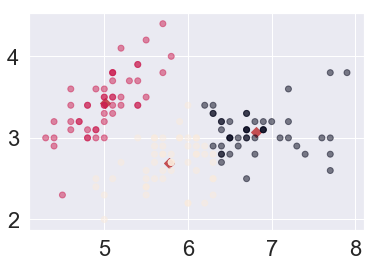

In [56]:
center_x = centers['Sepal_Length']
center_y = centers['Sepal_width']
plt.scatter(center_x, center_y, s=50, marker = 'D', c ='r')
plt.scatter(r['Sepal_Length'], r['Sepal_width'],c=r['predict'], alpha=0.5)
plt.show()

* * *

**pipeline**

scaler와 kmeans를 순차적으로 실행시키는 기능을 수행

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = KMeans(n_clusters = 3)
scaler = StandardScaler()
pipeline = make_pipeline(scaler, model)
pipeline.fit(feature)

predict = pd.DataFrame(pipeline.predict(feature))
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(feature)
    inertias.append(model.inertias_)
#inertia_:inertia(관성:응집) value를 이용해서 적정수준의 클러스터 개수 파악

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xtkcks(ks)
plt.show()

ct = pd.crosstab(data['labels'], r['predict'])
print(ct)

make_pipeline()

AttributeError: 'KMeans' object has no attribute 'inertias_'

* * *

**PCA**

In [58]:
import pandas as pd

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [79]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
print(X)
Y = df[['body_shape']]
print(Y)

  calory breakfast lunch dinner exercise
0   1200         1     0      0        2
1   2800         1     1      1        1
2   3500         2     2      1        0
3   1400         0     1      0        3
4   5000         2     2      2        0
5   1300         0     0      1        2
6   3000         1     0      1        1
7   4000         2     2      2        0
8   2600         0     2      0        0
9   3000         1     2      1        1
  body_shape
0     Skinny
1     Normal
2        Fat
3     Skinny
4        Fat
5     Skinny
6     Normal
7        Fat
8     Normal
9        Fat


In [60]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [61]:
x_std.shape

(10, 5)

In [62]:
features = x_std.T
features.shape

(5, 10)

In [65]:
covariance_matrix = np.cov(features) # 공분산 : X = (10,5) => (5,10)
covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [67]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print("고유벡터를 출력합니다 \n%s" % eig_vecs )

고유벡터를 출력합니다 
[[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [74]:
print("고유값을 출력합니다 : %s" % eig_vals)
print(eig_vals[0]/sum(eig_vals))

고유값을 출력합니다 : [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
0.7318321731427544


In [75]:
x_std.shape

(10, 5)

In [76]:
eig_vecs.T[0].shape

(5,)

In [77]:
projected_X = x_std.dot(eig_vecs.T[0]) # 5차원 ->1차원
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [80]:
res = pd.DataFrame(projected_X, columns = ['PC1'])
res['y-axis'] = 0.0
res['label'] = Y
res

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


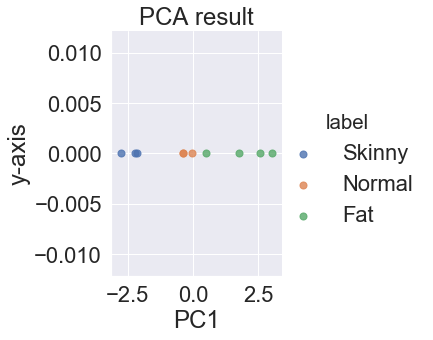

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot('PC1', 'y-axis', data = res, fit_reg = False, scatter_kws={"s":50}, hue = 'label')
plt.title('PCA result')
plt.show()